In [1]:
import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))
from astropy.modeling import models
import numpy as np
from astropy.modeling import fitting
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge</h2>
</div>


<div class="panel-body">

<p>Try fitting a Lorentzian and a Trapezoidal model to the same data. You can use tab-completion to find these models, or search in the <a href="http://docs.astropy.org/en/stable/modeling/index.html">documentation page</a>. Overplot these models on the data along with the Gaussian fit.</p>

</div>

</section>


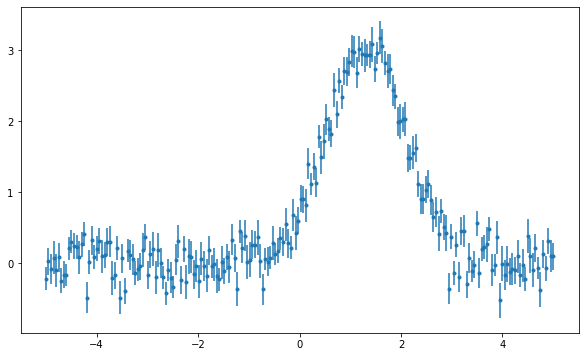

In [2]:
x = np.linspace(-5., 5., 200)
y = 3 * np.exp(-0.5 * (x - 1.3)**2 / 0.8**2)
y += np.random.normal(0., 0.2, x.shape)
yerr = np.random.uniform(0.15, 0.25, x.shape)
_ = plt.errorbar(x, y, yerr=yerr, fmt='.')

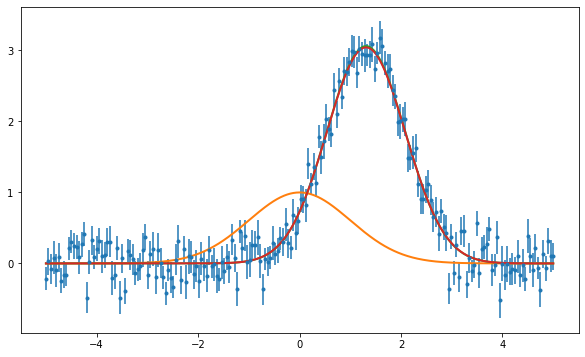

In [3]:
fitter = fitting.LevMarLSQFitter()
g_init = models.Gaussian1D()
g_fit = fitter(g_init, x, y)
g_fit_witherr = fitter(g_init, x, y, weights=1/yerr)

plt.errorbar(x, y, yerr=yerr, fmt='.')
xfine = np.linspace(-5, 5, 1000)
plt.plot(xfine, g_init(xfine), lw=2)
plt.plot(xfine, g_fit(xfine), lw=2)
plt.plot(xfine, g_fit_witherr(xfine), lw=2)

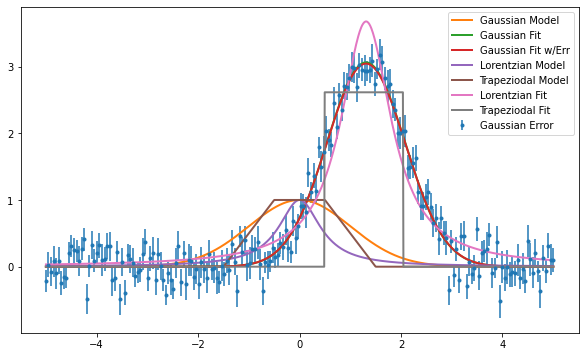

In [4]:
lor_init = models.Lorentz1D()
trap_init = models.Trapezoid1D()
lor_fit = fitter(lor_init, x, y)
trap_fit = fitter(trap_init, x, y)

plt.errorbar(x, y, yerr=yerr, fmt='.', label='Gaussian Error')
xfine = np.linspace(-5, 5, 1000)
plt.plot(xfine, g_init(xfine), lw=2, label='Gaussian Model')
plt.plot(xfine, g_fit(xfine), lw=2, label='Gaussian Fit')
plt.plot(xfine, g_fit_witherr(xfine), lw=2, label='Gaussian Fit w/Err')
plt.plot(xfine, lor_init(xfine), lw=2, label='Lorentzian Model')
plt.plot(xfine, trap_init(xfine), lw=2, label='Trapeziodal Model')
plt.plot(xfine, lor_fit(xfine), lw=2, label='Lorentzian Fit')
plt.plot(xfine, trap_fit(xfine), lw=2, label='Trapeziodal Fit')
plt.legend()
#plt.legend(['Gauss Error', 'Gaussian Model', 'Gaussian Fit', 'Gaussian Fit w/Err', 'Lorentzian Model', 'Trapeziodal Model', 'Lorentzian Fit', 'Trapeziodal Fit'])


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge</h2>
</div>


<div class="panel-body">

<p>Read in the GAIA source density FITS file we used in previous tutorials, and try fitting a 2D Gaussian to it.</p>

</div>

</section>


In [5]:
hdu_gaia = fits.open('../../../astropy_notebooks/data/LMCDensFits1k.fits')
#wcs_gaia = WCS(hdu_gaia.header)

In [6]:
hdu_gaia.info()

Filename: ../../../astropy_notebooks/data/LMCDensFits1k.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (1000, 750)   float64   


(750, 1000)
(750, 1000)
(750, 1000)


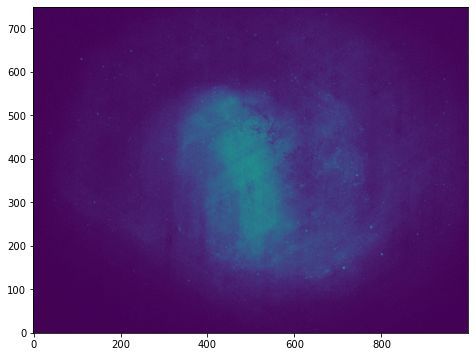

In [7]:
y2,x2 = np.mgrid[:750, :1000]
plt.imshow(hdu_gaia[0].data)
print(x2.shape)
print(y2.shape)
print(hdu_gaia[0].data.shape)

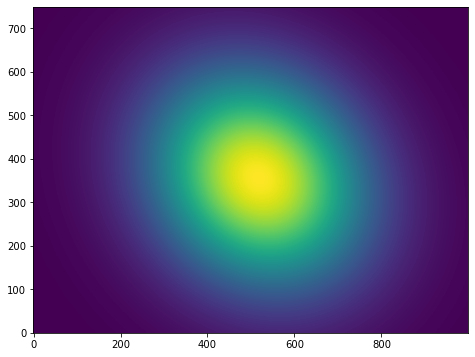

In [8]:
g_init = models.Gaussian2D()
g_fit = fitter(g_init, x2, y2, hdu_gaia[0].data)
plt.imshow(g_fit(x2, y2))


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Challenge</h2>
</div>


<div class="panel-body">

<ol>
<li>Modify the plot of the combined fit to show the individual model components for the best-fit parameters.</li>
<li>Continue the previous challenge to fit the LMC source density map by fitting two Gaussians to it. Be aware that especially with compound models, initial values matter! [advanced]</li>
</ol>

</div>

</section>


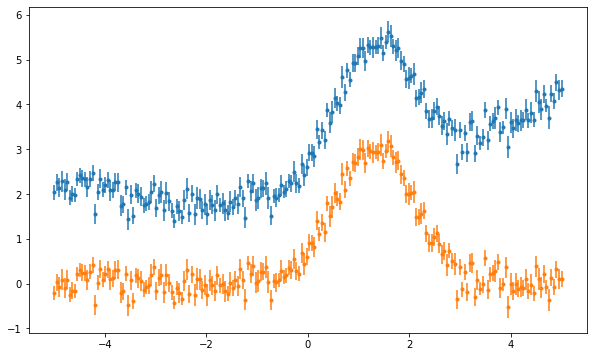

In [9]:
y_mod = y + 0.05 * x**2 +0.2 * x + 2
_ = plt.errorbar(x, y_mod, yerr=yerr, fmt='.')
_ = plt.errorbar(x, y, yerr=yerr, fmt='.')

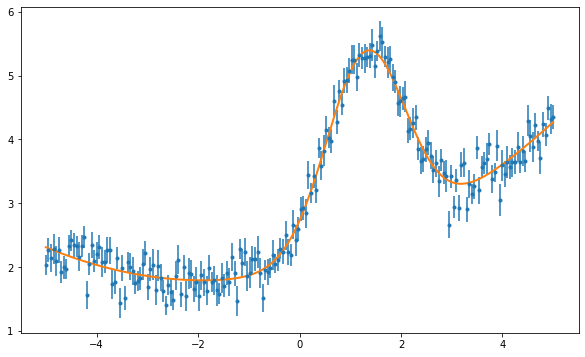

In [10]:
combined_init = models.Gaussian1D() + models.Polynomial1D(degree=2)
combined_fit = fitter(combined_init, x, y_mod, weights=1/yerr)
plt.errorbar(x, y_mod, yerr=yerr, fmt='.')
plt.plot(xfine, combined_fit(xfine), lw=2)

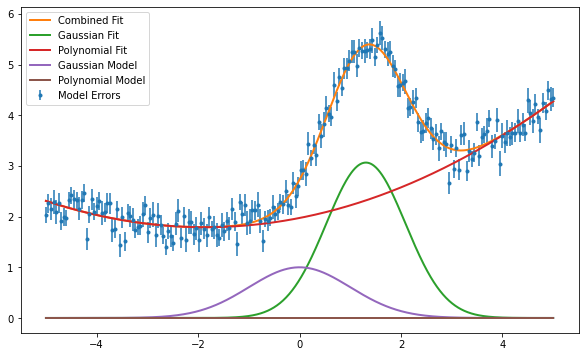

In [13]:
plt.errorbar(x, y_mod, yerr=yerr, fmt='.', label='Model Errors')
plt.plot(xfine, combined_fit(xfine), lw=2, label='Combined Fit')
plt.plot(xfine, combined_fit[0](xfine), lw=2, label='Gaussian Fit')
plt.plot(xfine, combined_fit[1](xfine), lw=2, label='Polynomial Fit')
plt.plot(xfine, combined_init[0](xfine), lw=2, label='Gaussian Model')
plt.plot(xfine, combined_init[1](xfine), lw=2, label='Polynomial Model')
plt.legend()